# Problem Statement

An education company named X Education sells online courses to industry professionals. On any given day, many professionals who are interested in the courses land on their website and browse for courses. 

 

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 

 

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyone. 

X Education has appointed you to help them select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires you to build a model wherein you need to assign a lead score to each of the leads such that the customers with a higher lead score have a higher conversion chance and the customers with a lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Exploratory Data Analysis

## Read data

In [2]:
df = pd.read_csv("Leads.csv")

In [3]:
df.head(5)

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [4]:
df.shape

(9240, 37)

In [5]:
# Check data imbalance in target variable
df.Converted.value_counts()

0    5679
1    3561
Name: Converted, dtype: int64

## Dropping customer level colums
- Prospect ID
- Lead Number

In [6]:
cols_to_drop = ["Prospect ID","Lead Number"]

In [7]:
df.drop(columns=cols_to_drop, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 35 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9204 non-null   object 
 2   Do Not Email                                   9240 non-null   object 
 3   Do Not Call                                    9240 non-null   object 
 4   Converted                                      9240 non-null   int64  
 5   TotalVisits                                    9103 non-null   float64
 6   Total Time Spent on Website                    9240 non-null   int64  
 7   Page Views Per Visit                           9103 non-null   float64
 8   Last Activity                                  9137 non-null   object 
 9   Country                                        6779 

## Dealing With Nulls

In [9]:
### Convert all strings to lowercase
df = df.applymap(lambda x: x.lower() if type(x)==str else x)

In [10]:
### Replace "Select" with Nulls
df.replace("select", np.nan, inplace=True)

In [11]:
col_nulls_perc = round(df.isnull().sum()/df.shape[0]*100,2)
high_nulls_col = col_nulls_perc.loc[lambda x: x>30]

In [12]:
col_nulls_perc

Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper 

In [13]:
high_nulls_col

Specialization                        36.58
How did you hear about X Education    78.46
Tags                                  36.29
Lead Quality                          51.59
Lead Profile                          74.19
City                                  39.71
Asymmetrique Activity Index           45.65
Asymmetrique Profile Index            45.65
Asymmetrique Activity Score           45.65
Asymmetrique Profile Score            45.65
dtype: float64

### Above Cols have High Null Values we can drop them

In [14]:
df.drop(columns=high_nulls_col.index, inplace=True)

## Categorical Data Transformation

In [15]:
# convert 'Total Time Spent on Website' to float as its a continous variable
df['Total Time Spent on Website'] = df['Total Time Spent on Website'].astype(float)

In [16]:
boolean_cols = []
vals_to_be_transformed = {}
def get_col_details(df):
    for col in df.columns:
        if df[col].dtype != float and col != 'Converted':
            val_counts = round(df[col].value_counts(normalize=True)*100,2)
            print("")
            print(f"{'-*'*10}{col}{'-*'*10}")
            print(val_counts)
            if set(val_counts.index).issubset({'no', 'yes'}):
                boolean_cols.append(col)
            else:
                vals_to_be_transformed[col] = set(val_counts.loc[lambda x: x<=1].index)

In [17]:
get_col_details(df)


-*-*-*-*-*-*-*-*-*-*Lead Origin-*-*-*-*-*-*-*-*-*-*
landing page submission    52.88
api                        38.74
lead add form               7.77
lead import                 0.60
quick add form              0.01
Name: Lead Origin, dtype: float64

-*-*-*-*-*-*-*-*-*-*Lead Source-*-*-*-*-*-*-*-*-*-*
google               31.21
direct traffic       27.63
olark chat           19.07
organic search       12.54
reference             5.80
welingak website      1.54
referral sites        1.36
facebook              0.60
bing                  0.07
click2call            0.04
social media          0.02
live chat             0.02
press_release         0.02
pay per click ads     0.01
blog                  0.01
welearn               0.01
welearnblog_home      0.01
youtubechannel        0.01
testone               0.01
nc_edm                0.01
Name: Lead Source, dtype: float64

-*-*-*-*-*-*-*-*-*-*Do Not Email-*-*-*-*-*-*-*-*-*-*
no     92.06
yes     7.94
Name: Do Not Email, dtype: float64

-*-*-

### These cols can be converted to 0("no") and 1("yes"):

In [18]:
pprint(boolean_cols)   

['Do Not Email',
 'Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque',
 'A free copy of Mastering The Interview']


### These values in a column can be categorised as 'others' as they represent less than 1% of values:

In [19]:
pprint(vals_to_be_transformed)

{'Country': {'asia/pacific region',
             'australia',
             'bahrain',
             'bangladesh',
             'belgium',
             'canada',
             'china',
             'denmark',
             'france',
             'germany',
             'ghana',
             'hong kong',
             'indonesia',
             'italy',
             'kenya',
             'kuwait',
             'liberia',
             'malaysia',
             'netherlands',
             'nigeria',
             'oman',
             'philippines',
             'qatar',
             'russia',
             'saudi arabia',
             'singapore',
             'south africa',
             'sri lanka',
             'sweden',
             'switzerland',
             'tanzania',
             'uganda',
             'united arab emirates',
             'united kingdom',
             'unknown',
             'vietnam'},
 'Last Activity': {'approached upfront',
                   'email marked spam',
    

In [20]:
df[boolean_cols] = df[boolean_cols].applymap(lambda x: 1 if x=='yes' else 0)

In [21]:
for col in vals_to_be_transformed.keys():
    df[col] = df[col].apply(lambda x: x if x not in vals_to_be_transformed[col] else "others")

### Impute Nulls:
- categorical_cols: 'not_specified'
- Numeric_cols: Mean

In [22]:
for col in vals_to_be_transformed.keys():
    df[col] = df[col].fillna('not specified')

In [23]:
df["TotalVisits"].mean()

3.445237833681204

In [24]:
df.fillna({"TotalVisits": round(df["TotalVisits"].mean(),2), 
           "Page Views Per Visit": round(df["Page Views Per Visit"].mean(),2)},
         inplace=True)

In [25]:
get_col_details(df)


-*-*-*-*-*-*-*-*-*-*Lead Origin-*-*-*-*-*-*-*-*-*-*
landing page submission    52.88
api                        38.74
lead add form               7.77
others                      0.61
Name: Lead Origin, dtype: float64

-*-*-*-*-*-*-*-*-*-*Lead Source-*-*-*-*-*-*-*-*-*-*
google              31.09
direct traffic      27.52
olark chat          18.99
organic search      12.49
reference            5.78
welingak website     1.54
referral sites       1.35
others               0.84
not specified        0.39
Name: Lead Source, dtype: float64

-*-*-*-*-*-*-*-*-*-*Do Not Email-*-*-*-*-*-*-*-*-*-*
0    92.06
1     7.94
Name: Do Not Email, dtype: float64

-*-*-*-*-*-*-*-*-*-*Do Not Call-*-*-*-*-*-*-*-*-*-*
0    99.98
1     0.02
Name: Do Not Call, dtype: float64

-*-*-*-*-*-*-*-*-*-*Last Activity-*-*-*-*-*-*-*-*-*-*
email opened                 37.20
sms sent                     29.71
olark chat conversation      10.53
page visited on website       6.93
converted to lead             4.63
email boun

# Univariate Analysis

## Categorical Columns

In [26]:
categorical_cols = [col for col in df.columns if df[col].dtype!=float and col != 'Converted']
numeric_cols = [col for col in df.columns if df[col].dtype==float and col != 'Converted']

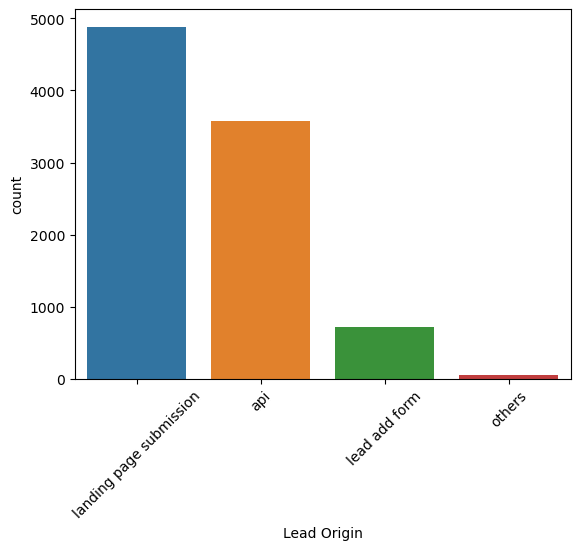

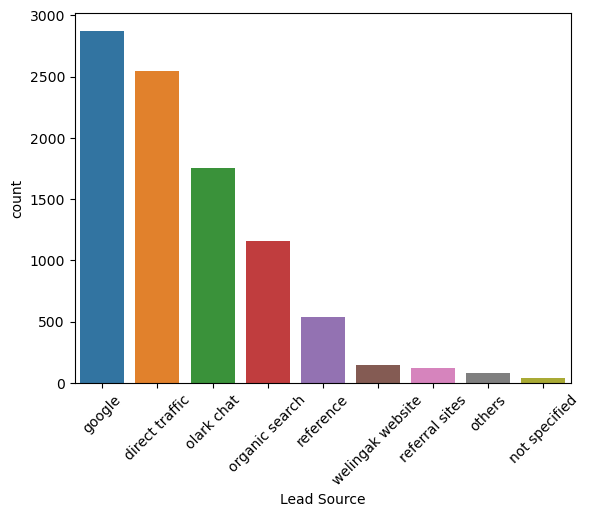

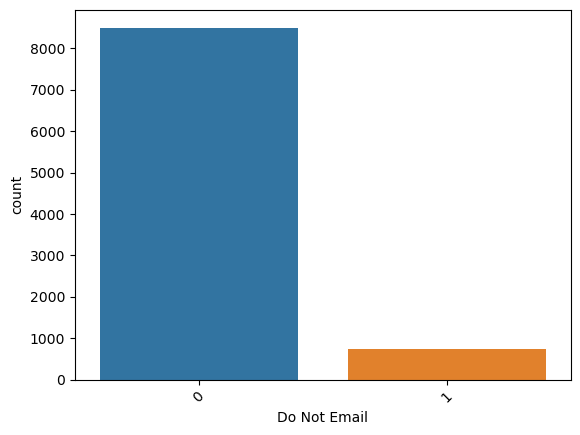

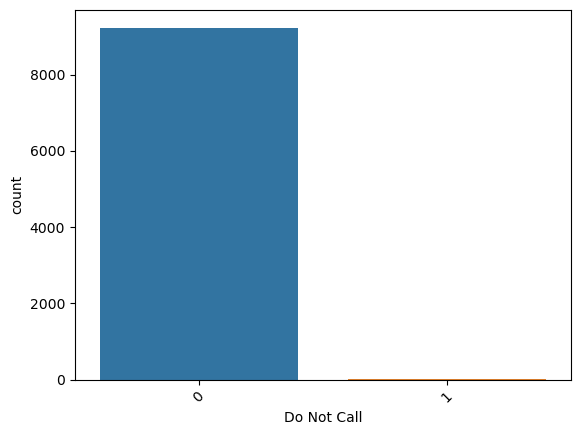

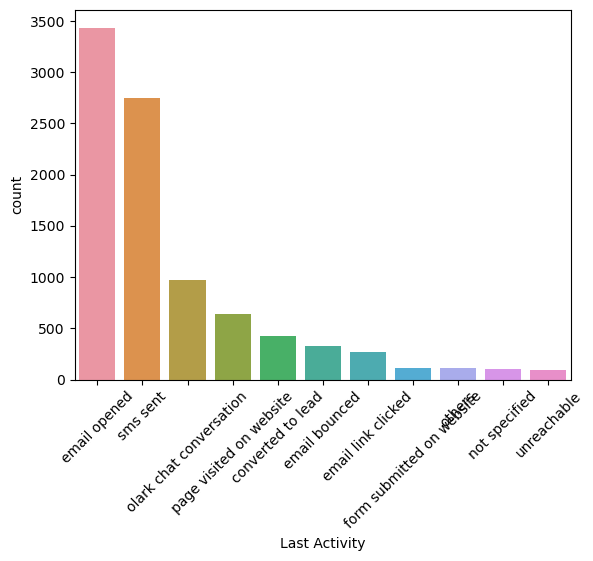

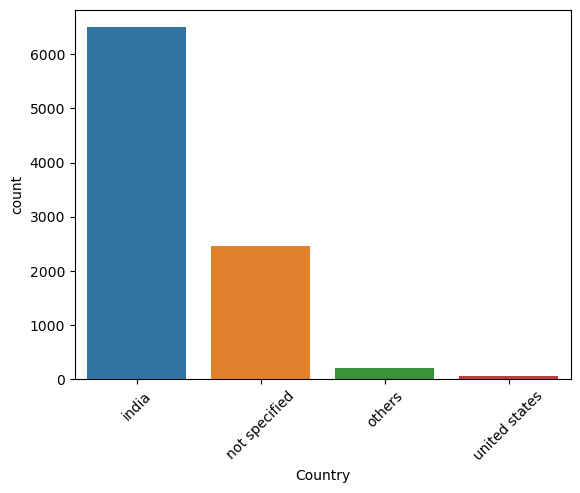

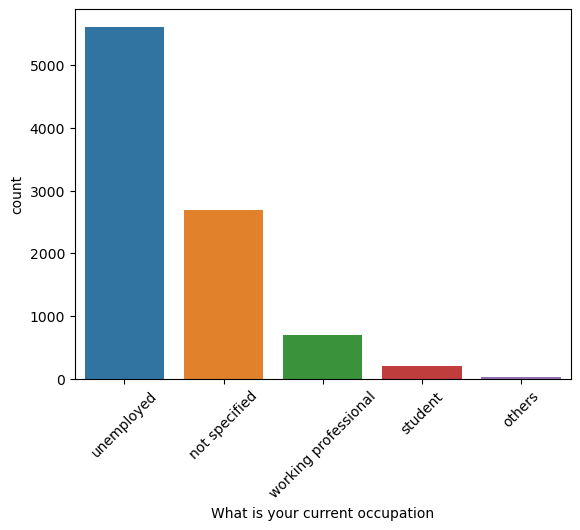

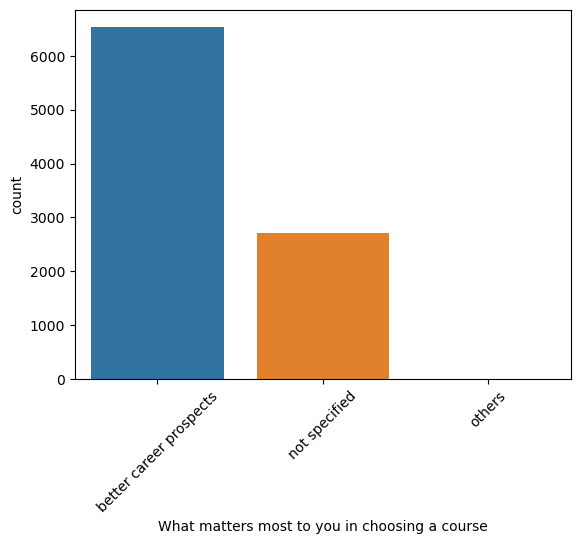

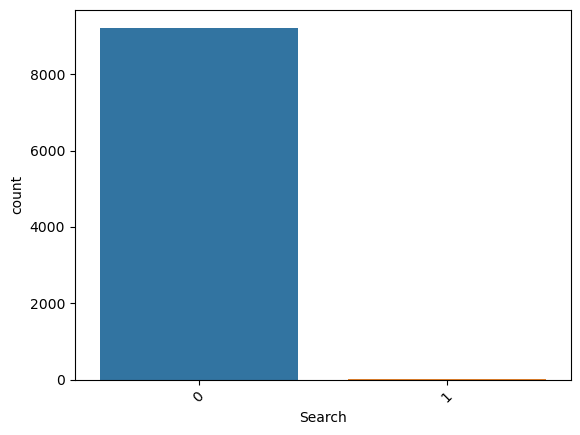

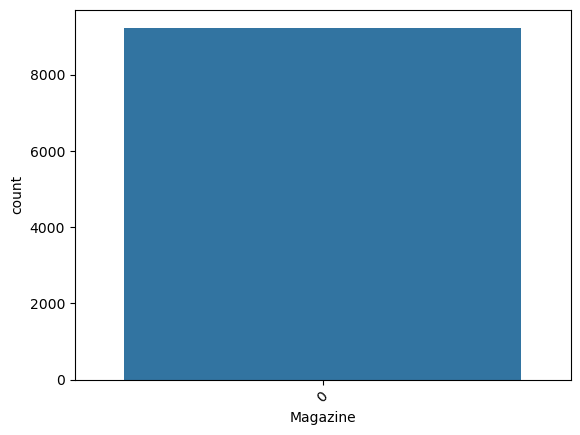

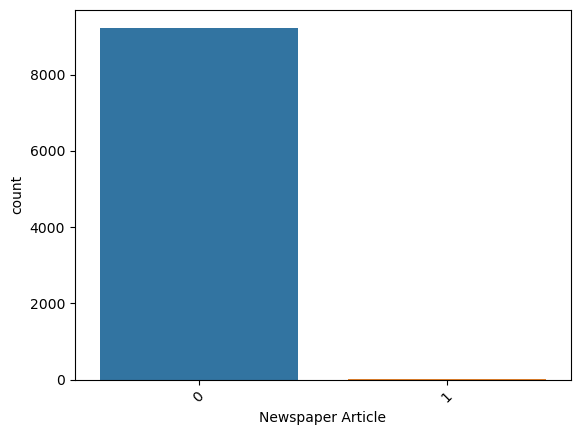

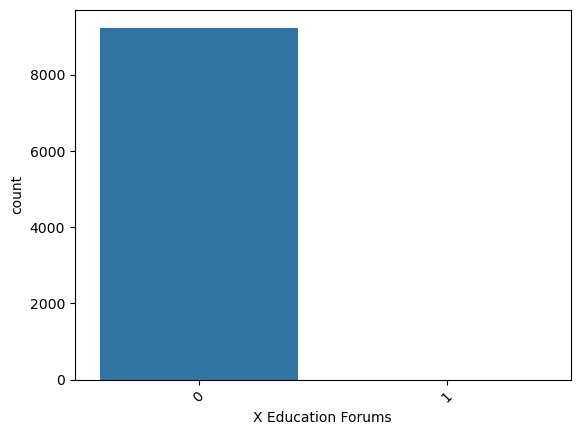

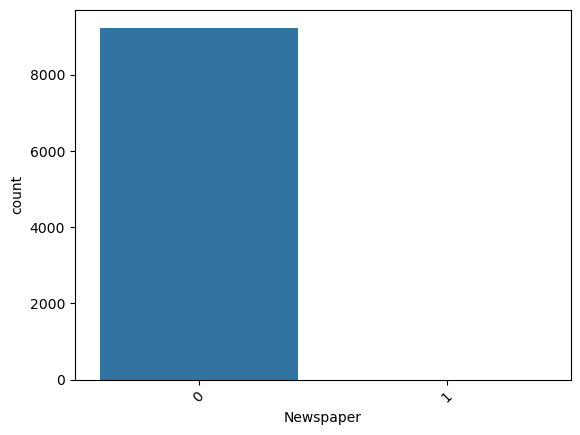

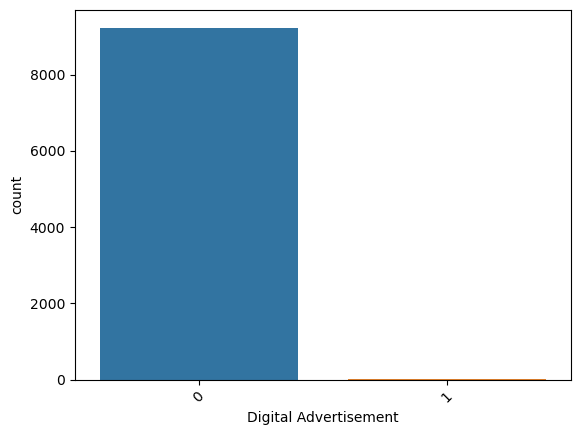

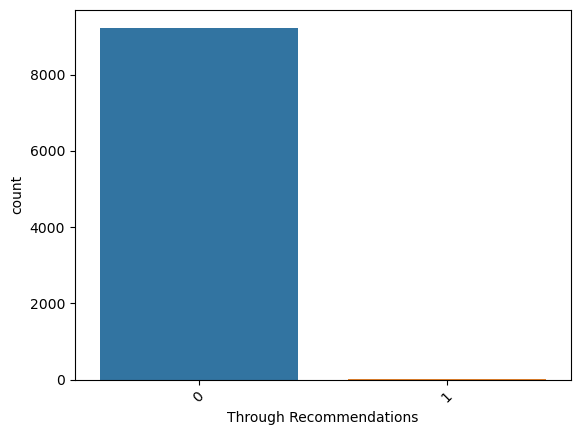

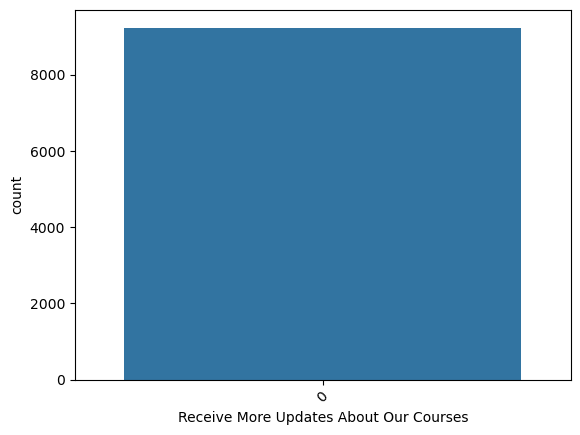

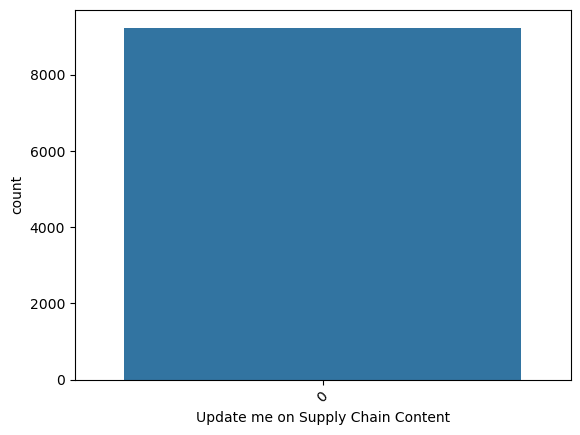

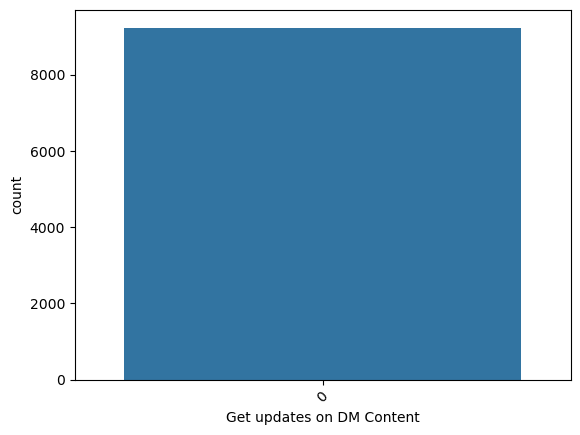

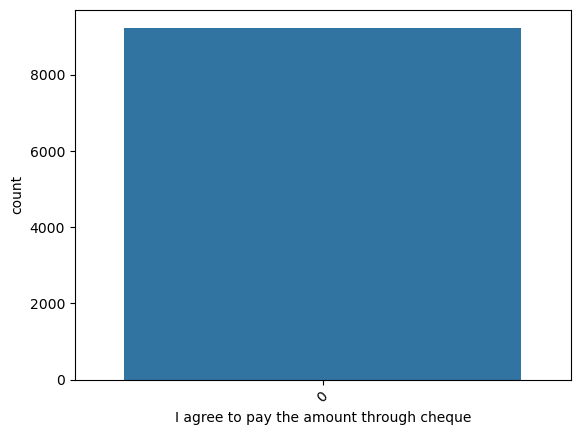

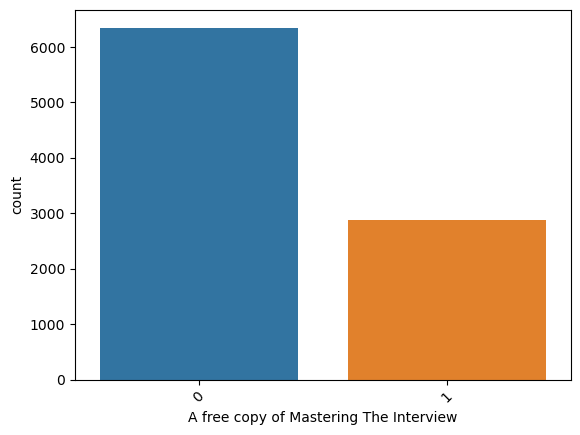

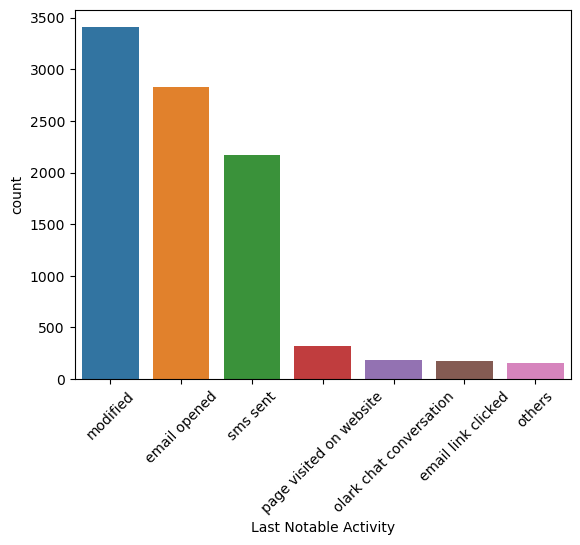

In [27]:
for col in categorical_cols:
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.xticks(rotation=45)
    plt.show()

### These columns are highly skewed, we can drop them:

In [28]:
high_skew_cols = []
for col in categorical_cols.copy():
    if list(round(df[col].value_counts(normalize=True)*100,2).loc[lambda x: x>99].index):
        high_skew_cols.append(col)
        categorical_cols.remove(col)
pprint(high_skew_cols)

['Do Not Call',
 'Search',
 'Magazine',
 'Newspaper Article',
 'X Education Forums',
 'Newspaper',
 'Digital Advertisement',
 'Through Recommendations',
 'Receive More Updates About Our Courses',
 'Update me on Supply Chain Content',
 'Get updates on DM Content',
 'I agree to pay the amount through cheque']


In [29]:
df.drop(columns=high_skew_cols, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9240 non-null   object 
 1   Lead Source                                    9240 non-null   object 
 2   Do Not Email                                   9240 non-null   int64  
 3   Converted                                      9240 non-null   int64  
 4   TotalVisits                                    9240 non-null   float64
 5   Total Time Spent on Website                    9240 non-null   float64
 6   Page Views Per Visit                           9240 non-null   float64
 7   Last Activity                                  9240 non-null   object 
 8   Country                                        9240 non-null   object 
 9   What is your current occupation                9240 

## Numeric Columns

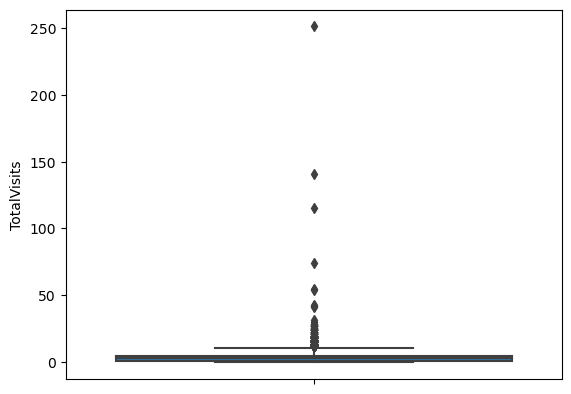

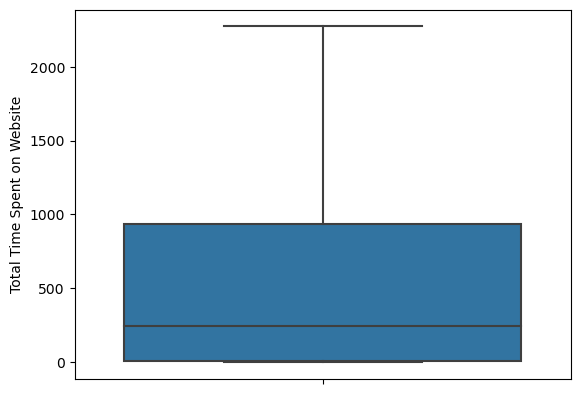

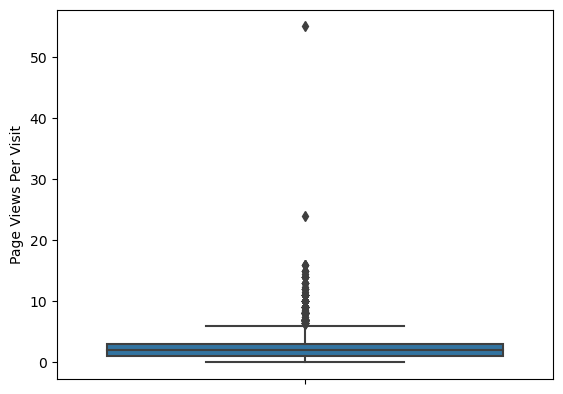

In [31]:
for col in numeric_cols:
    sns.boxplot(y=col, data=df)
    plt.show()

### There are outliers in "Page Views Per Visit" and "TotalVisits", we can cap the values:
- "Page Views Per Visit": 75
- "TotalVisits": 20

In [32]:
df["Page Views Per Visit"] = df["Page Views Per Visit"].apply(lambda x: x if x<15 else 15)
df["TotalVisits"] = df["TotalVisits"].apply(lambda x: x if x<30 else 30)

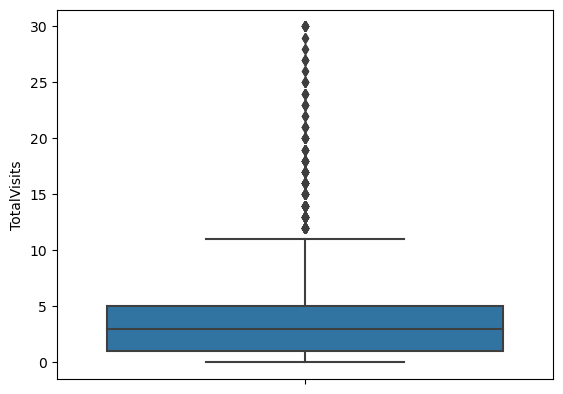

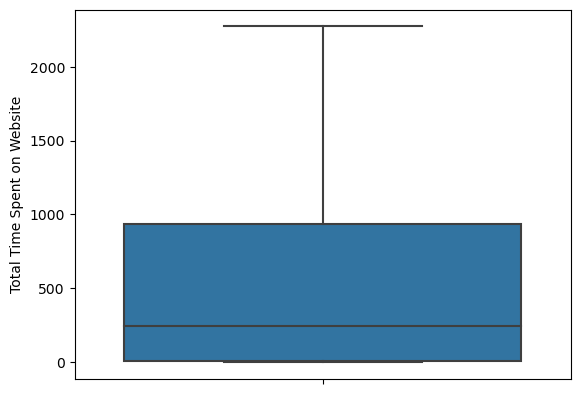

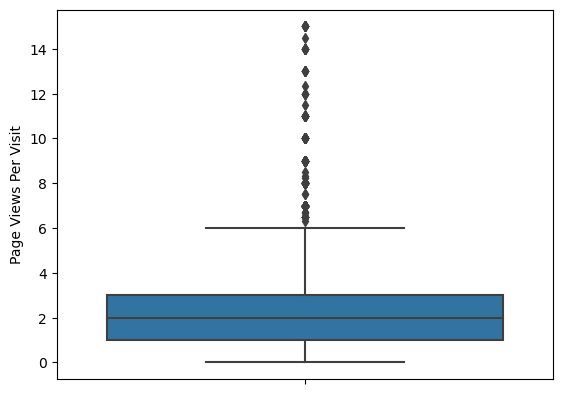

In [33]:
for col in numeric_cols:
    sns.boxplot(y=col, data=df)
    plt.show()

<AxesSubplot:>

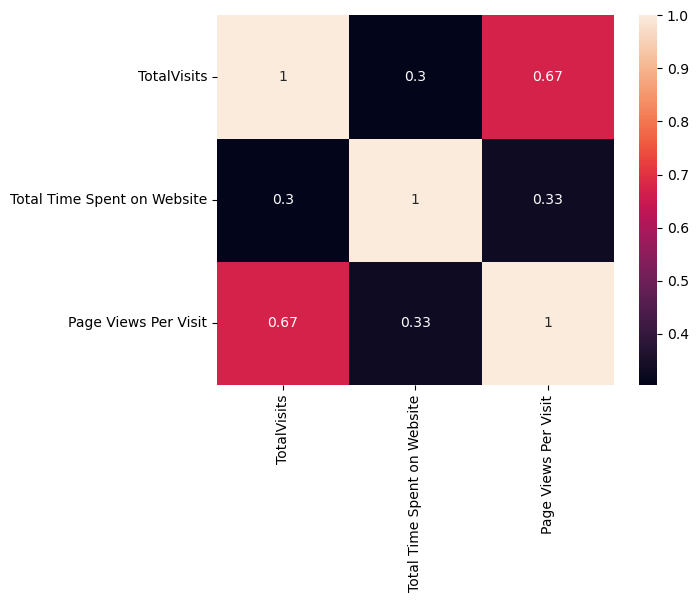

In [34]:
sns.heatmap(df[numeric_cols].corr(), annot=True)

## Bivariate Analysis

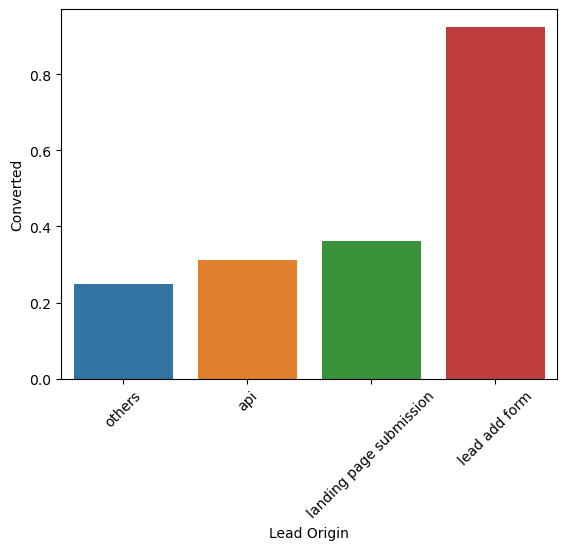

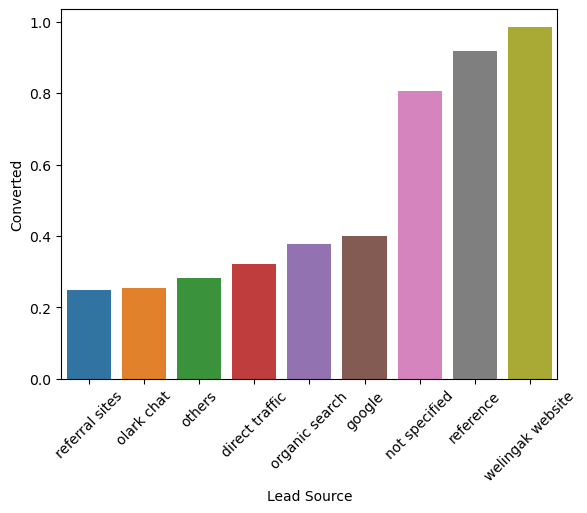

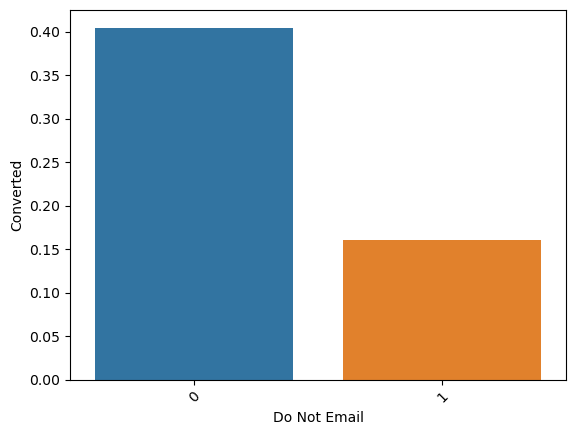

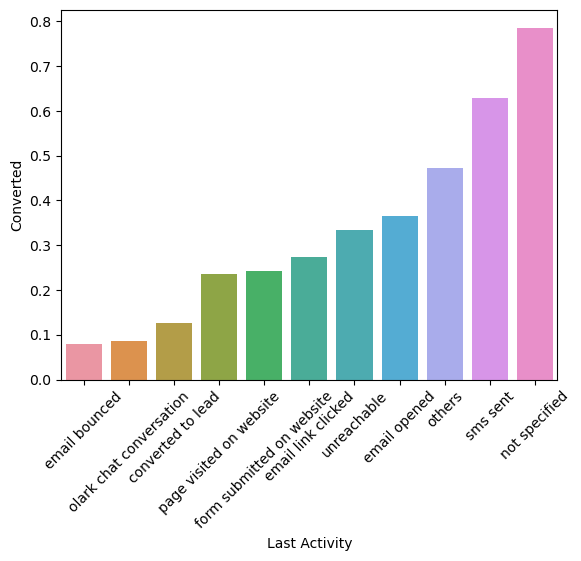

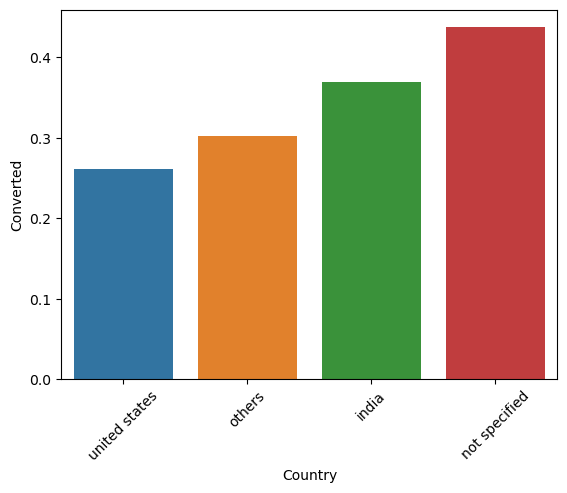

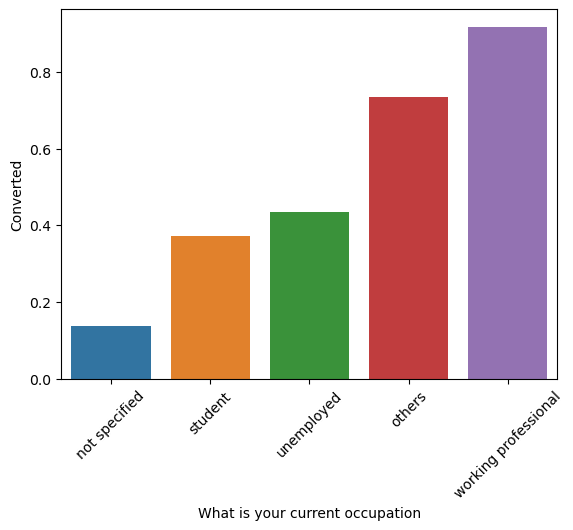

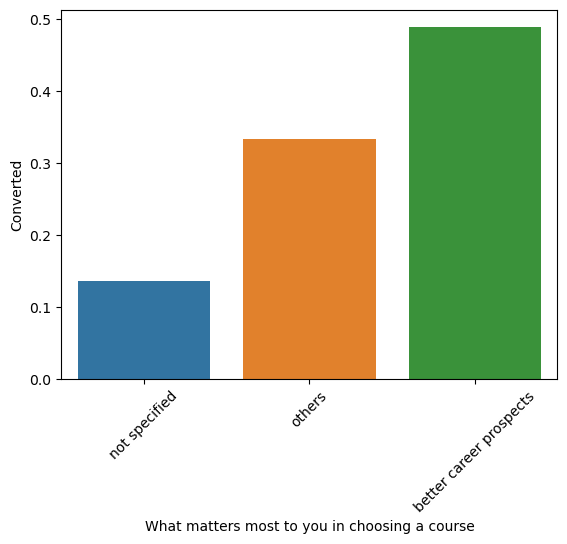

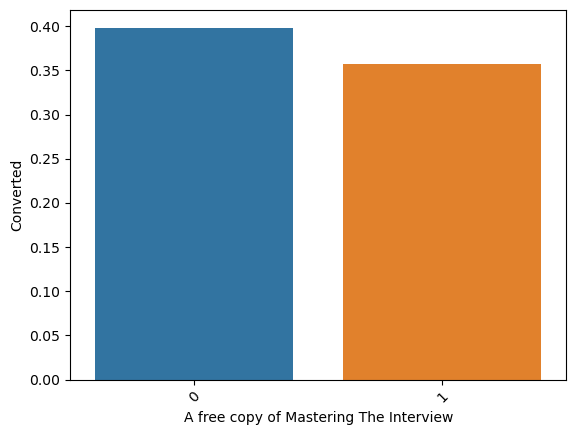

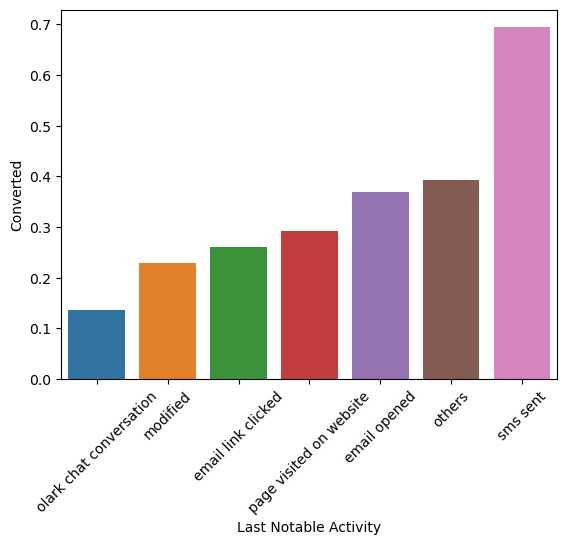

In [35]:
for col in categorical_cols:
    plot_df = df.groupby(col).agg({'Converted': "mean"}).sort_values('Converted')
    sns.barplot(data=plot_df, 
                x=plot_df.index, 
                y="Converted", 
                ci=None)
    plt.xticks(rotation=45)
    plt.show()

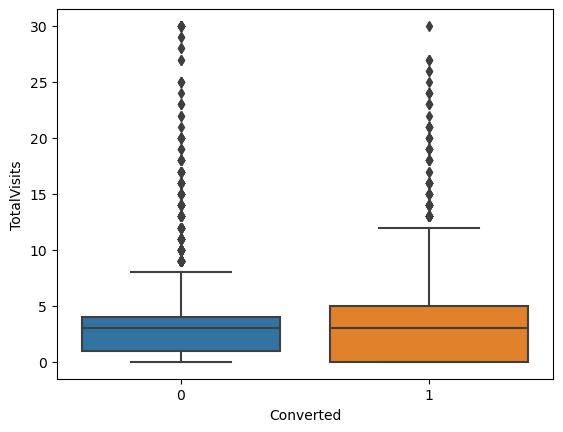

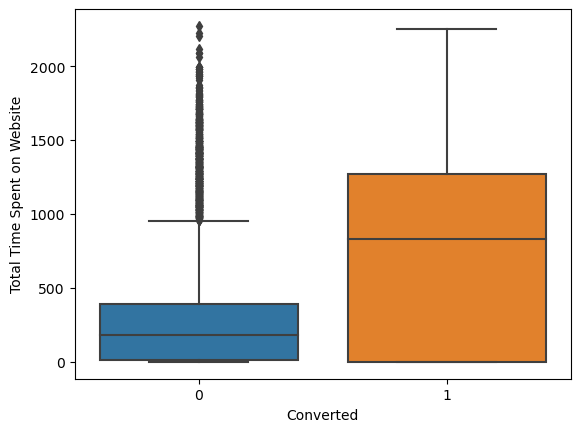

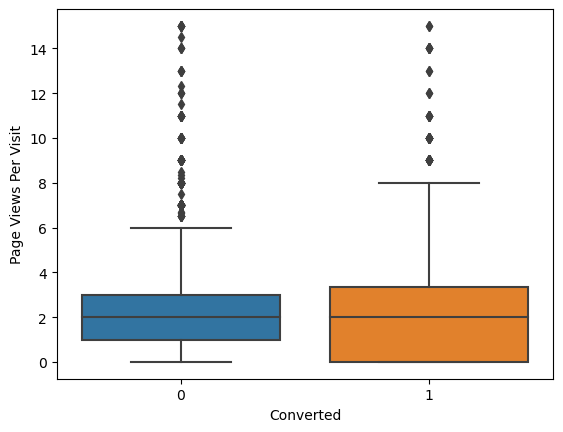

In [36]:
for col in numeric_cols:
    sns.boxplot(y=col, data=df, x='Converted')
    plt.show()

## Meaningful Observation:
- Lead Orgin: "Lead Add Form" has high converison rate, but "Landing Page Submission" has huge volume
- Working Professional looking to have Better carrer prospects have high conversion rate
- People Who spend more time on website have high conversion rate

### Store Graphs for PPT

In [37]:
def save_count_plot(df, col):
    sns.countplot(data=df, x=col,order=df[col].value_counts().index)
    fig1 = plt.gcf()
    title = f"{col} Data Distribution"
    plt.title(title)
    plt.ylabel("Count")
    plt.xticks(rotation=90)
    plt.figure(figsize=(860/192, 880/192), dpi=192)
    fig1.savefig(f'Graphs/{title.lower().replace(" ","_")}',dpi=192, 
                 pad_inches=0.1, bbox_inches="tight", transparent=True)
    
def save_bar_plot(df, col):
    plot_df = df.groupby(col).agg({'converted': "mean"}).sort_values('converted')
    sns.barplot(data=plot_df, 
                x=plot_df.index, 
                y="converted", 
                ci=None)
    fig1 = plt.gcf()
    title = f"converted vs {col}"
    plt.title(title)
    plt.ylabel("converted")
    plt.xticks(rotation=90)
    plt.figure(figsize=(860/192, 880/192), dpi=192)
    fig1.savefig(f'Graphs/{title.lower().replace(" ","_")}',dpi=192, 
                 pad_inches=0.1, bbox_inches="tight", transparent=True)

def save_box_plot(df, col):
    sns.boxplot(data=df, 
                y=col, 
                x="converted")
    fig1 = plt.gcf()
    title = f"{col} vs converted"
    plt.title(title)
    plt.xlabel("converted")
    plt.ylabel(col)
    plt.xticks(rotation=90)
    plt.figure(figsize=(860/192, 880/192), dpi=192)
    fig1.savefig(f'Graphs/{title.lower().replace(" ","_")}',dpi=192, 
                 pad_inches=0.1, bbox_inches="tight", transparent=True)

    

## Rename Columns

In [38]:
df.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [39]:
cols_renamed = {col:col.replace(" ","_").lower() for col in df.columns}
df.rename(columns=cols_renamed, inplace=True)
cols_renamed["what_is_your_current_occupation"] = "occupation"
cols_renamed["what_matters_most_to_you_in_choosing_a_course"] = "course_reason"
cols_renamed["a_free_copy_of_mastering_the_interview"] = "mastreing_interview_opt"
df.rename(columns=cols_renamed, inplace=True)

In [40]:
df.rename(columns=cols_renamed, inplace=True)

# Save Plots for Graphs

In [41]:
df.columns

Index(['lead_origin', 'lead_source', 'do_not_email', 'converted',
       'totalvisits', 'total_time_spent_on_website', 'page_views_per_visit',
       'last_activity', 'country', 'occupation', 'course_reason',
       'mastreing_interview_opt', 'last_notable_activity'],
      dtype='object')

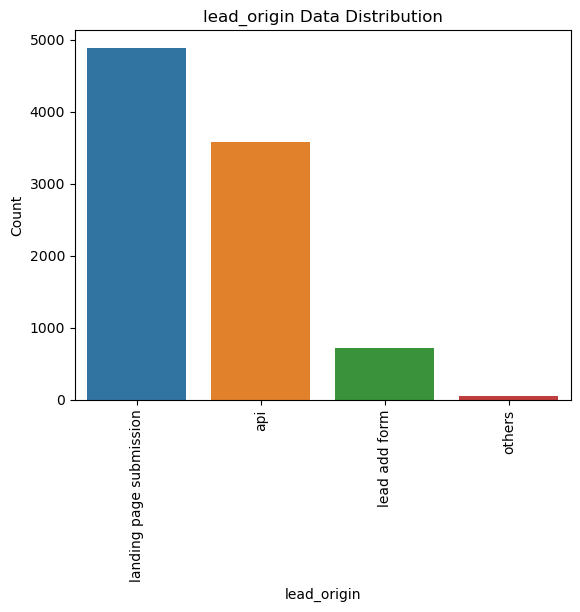

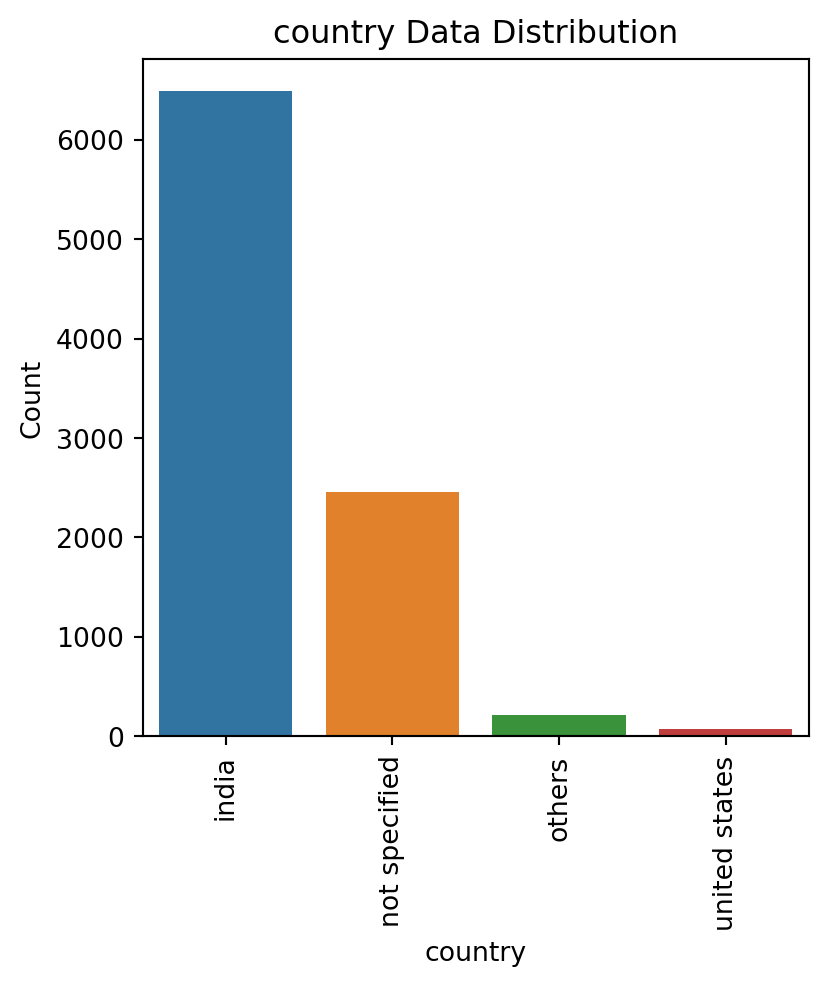

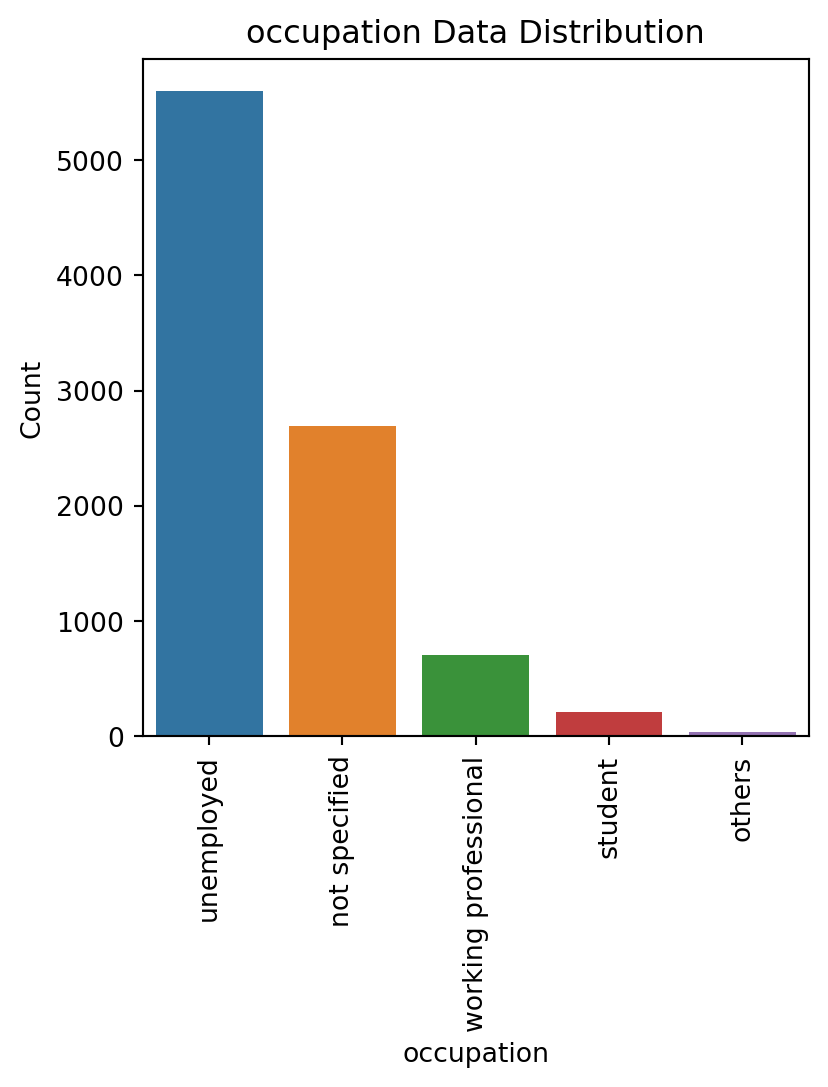

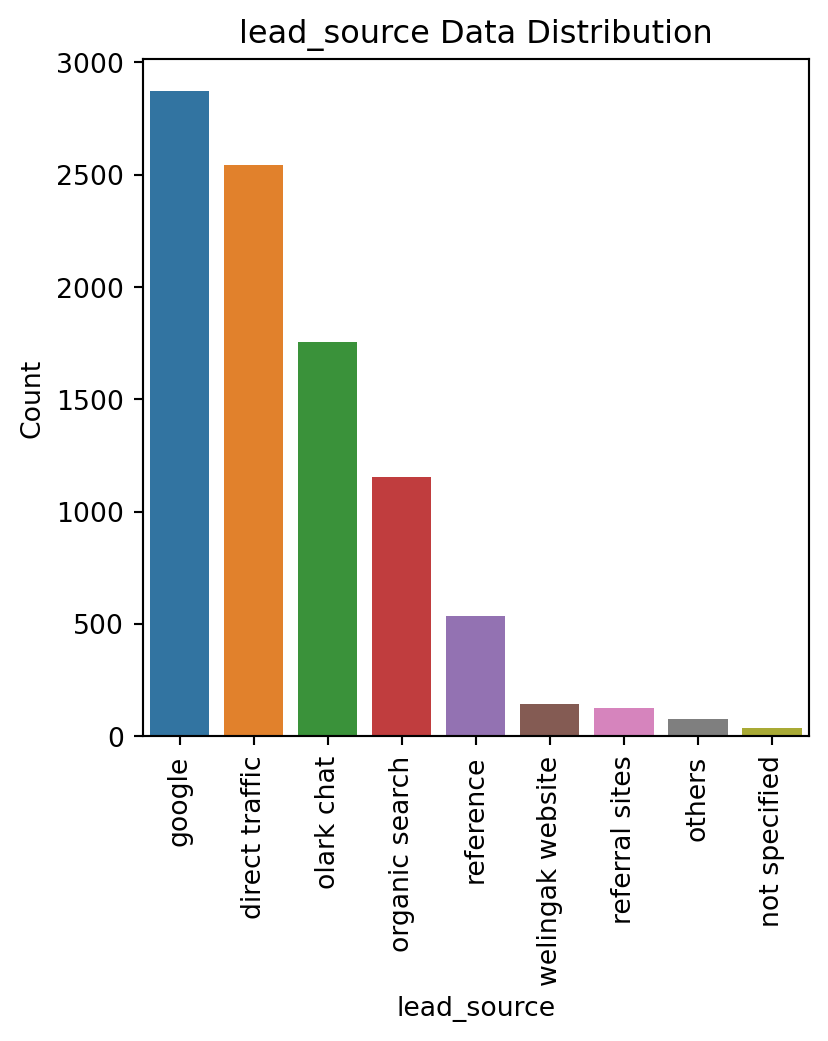

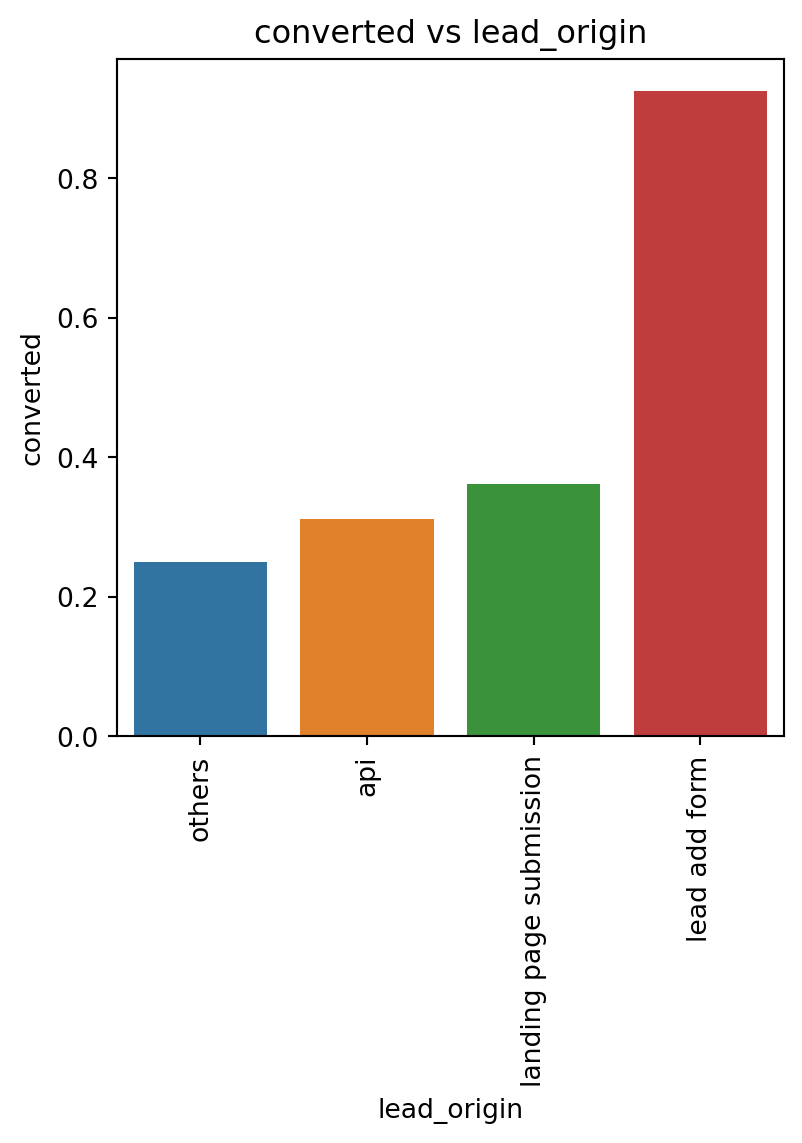

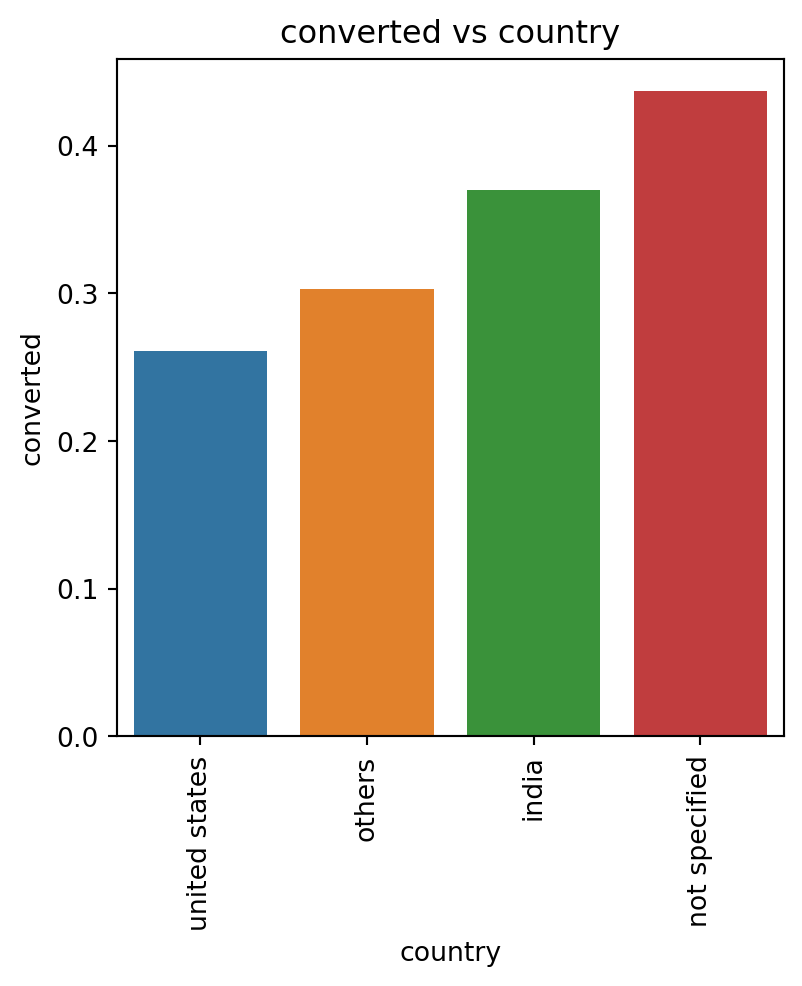

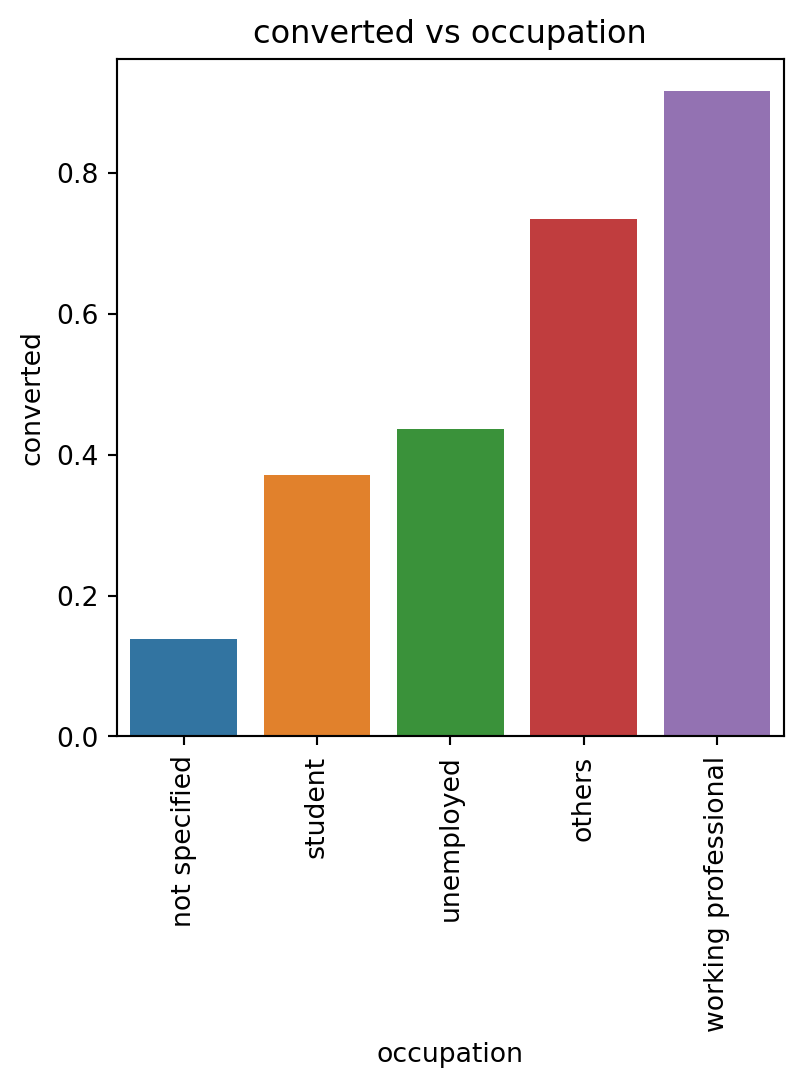

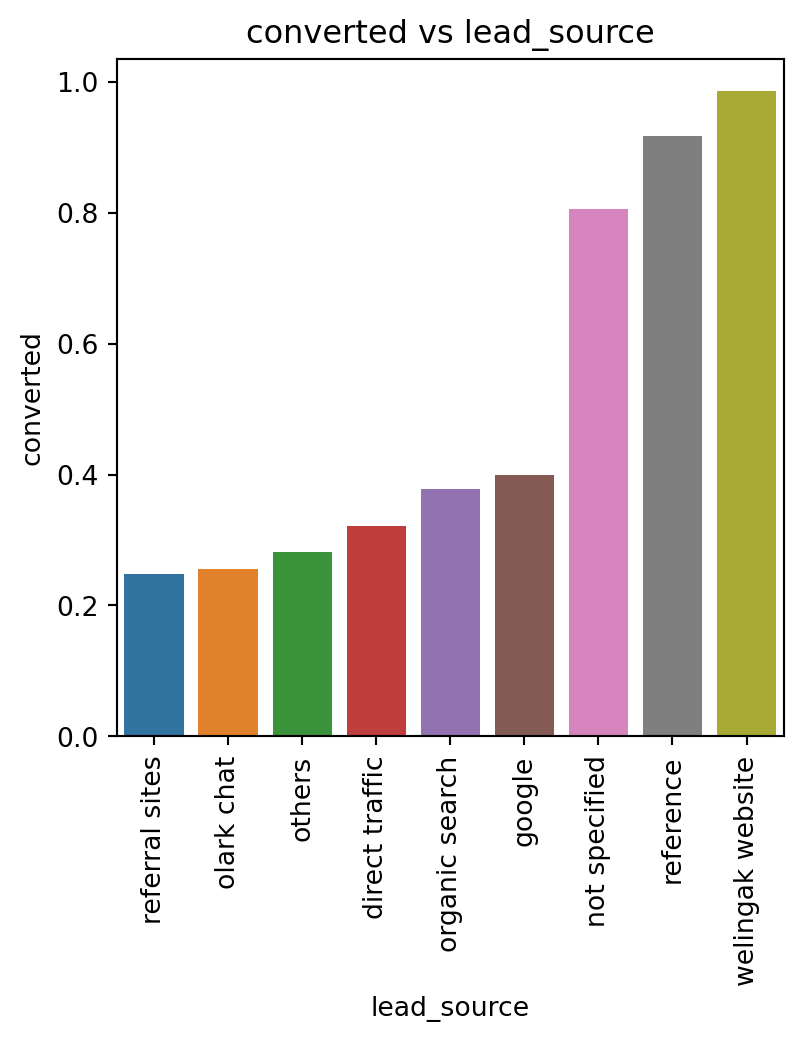

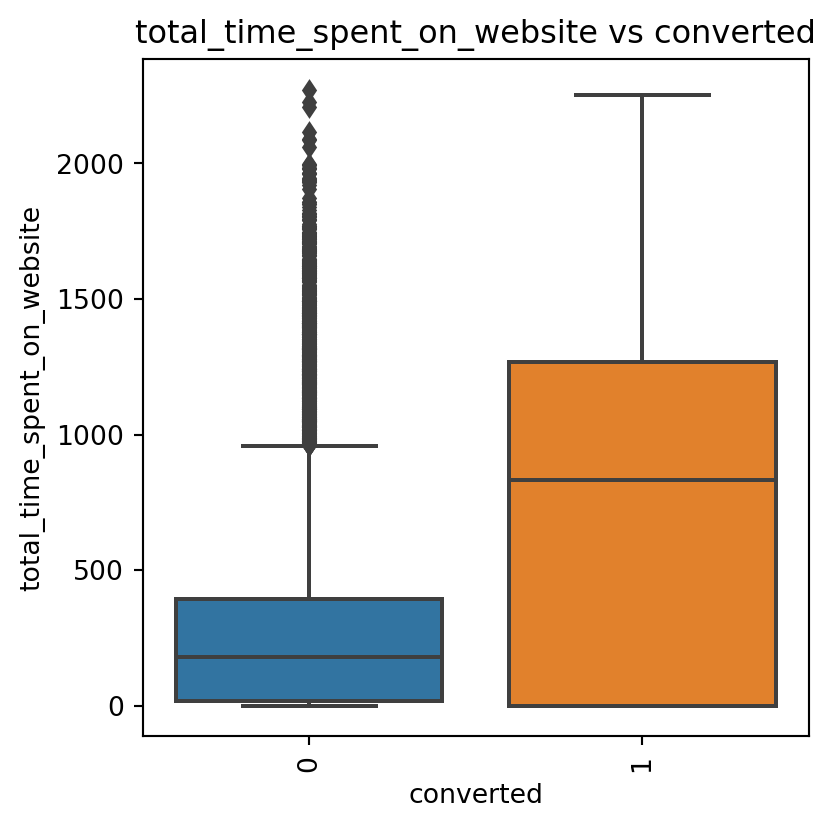

<Figure size 860x880 with 0 Axes>

In [42]:
save_count_plot(df, "lead_origin")
save_count_plot(df, "country")
save_count_plot(df, "occupation")
save_count_plot(df, "lead_source")
save_bar_plot(df, "lead_origin")
save_bar_plot(df, "country")
save_bar_plot(df, "occupation")
save_bar_plot(df, "lead_source")
save_box_plot(df, "total_time_spent_on_website")

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   lead_origin                  9240 non-null   object 
 1   lead_source                  9240 non-null   object 
 2   do_not_email                 9240 non-null   int64  
 3   converted                    9240 non-null   int64  
 4   totalvisits                  9240 non-null   float64
 5   total_time_spent_on_website  9240 non-null   float64
 6   page_views_per_visit         9240 non-null   float64
 7   last_activity                9240 non-null   object 
 8   country                      9240 non-null   object 
 9   occupation                   9240 non-null   object 
 10  course_reason                9240 non-null   object 
 11  mastreing_interview_opt      9240 non-null   int64  
 12  last_notable_activity        9240 non-null   object 
dtypes: float64(3), int

# Modelling

In [44]:
target_col = 'converted'
categorical_cols = [col for col in df.columns if df[col].dtype!=float and col != target_col]
numeric_cols = [col for col in df.columns if df[col].dtype==float and col != target_col]

## Create Dummy Variable

In [45]:
len(df.columns), len(numeric_cols), len(categorical_cols)

(13, 3, 9)

In [46]:
ml_df = pd.get_dummies(df, drop_first=False, columns=categorical_cols)

In [47]:
pprint(ml_df.columns)

Index(['converted', 'totalvisits', 'total_time_spent_on_website',
       'page_views_per_visit', 'lead_origin_api',
       'lead_origin_landing page submission', 'lead_origin_lead add form',
       'lead_origin_others', 'lead_source_direct traffic',
       'lead_source_google', 'lead_source_not specified',
       'lead_source_olark chat', 'lead_source_organic search',
       'lead_source_others', 'lead_source_reference',
       'lead_source_referral sites', 'lead_source_welingak website',
       'do_not_email_0', 'do_not_email_1', 'last_activity_converted to lead',
       'last_activity_email bounced', 'last_activity_email link clicked',
       'last_activity_email opened', 'last_activity_form submitted on website',
       'last_activity_not specified', 'last_activity_olark chat conversation',
       'last_activity_others', 'last_activity_page visited on website',
       'last_activity_sms sent', 'last_activity_unreachable', 'country_india',
       'country_not specified', 'country_oth

In [48]:
insignificant_dummy_var = ["lead_origin_others", "lead_source_not specified", 
                           "do_not_email_0","last_activity_not specified",
                          "country_not specified", "occupation_not specified",
                           "course_reason_not specified","mastreing_interview_opt_0",
                          "last_notable_activity_others"]
len(insignificant_dummy_var)

9

In [49]:
ml_df.drop(columns=insignificant_dummy_var,inplace=True)

In [50]:
ml_df.head(5)

,converted,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_api,lead_origin_landing page submission,lead_origin_lead add form,lead_source_direct traffic,lead_source_google,lead_source_olark chat,...,occupation_working professional,course_reason_better career prospects,course_reason_others,mastreing_interview_opt_1,last_notable_activity_email link clicked,last_notable_activity_email opened,last_notable_activity_modified,last_notable_activity_olark chat conversation,last_notable_activity_page visited on website,last_notable_activity_sms sent
0,0,0.0,0.0,0.0,1,0,0,0,0,1,...,0,1,0,0,0,0,1,0,0,0
1,0,5.0,674.0,2.5,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
2,1,2.0,1532.0,2.0,0,1,0,1,0,0,...,0,1,0,1,0,1,0,0,0,0
3,0,1.0,305.0,1.0,0,1,0,1,0,0,...,0,1,0,0,0,0,1,0,0,0
4,1,2.0,1428.0,1.0,0,1,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0


# Check Correlations

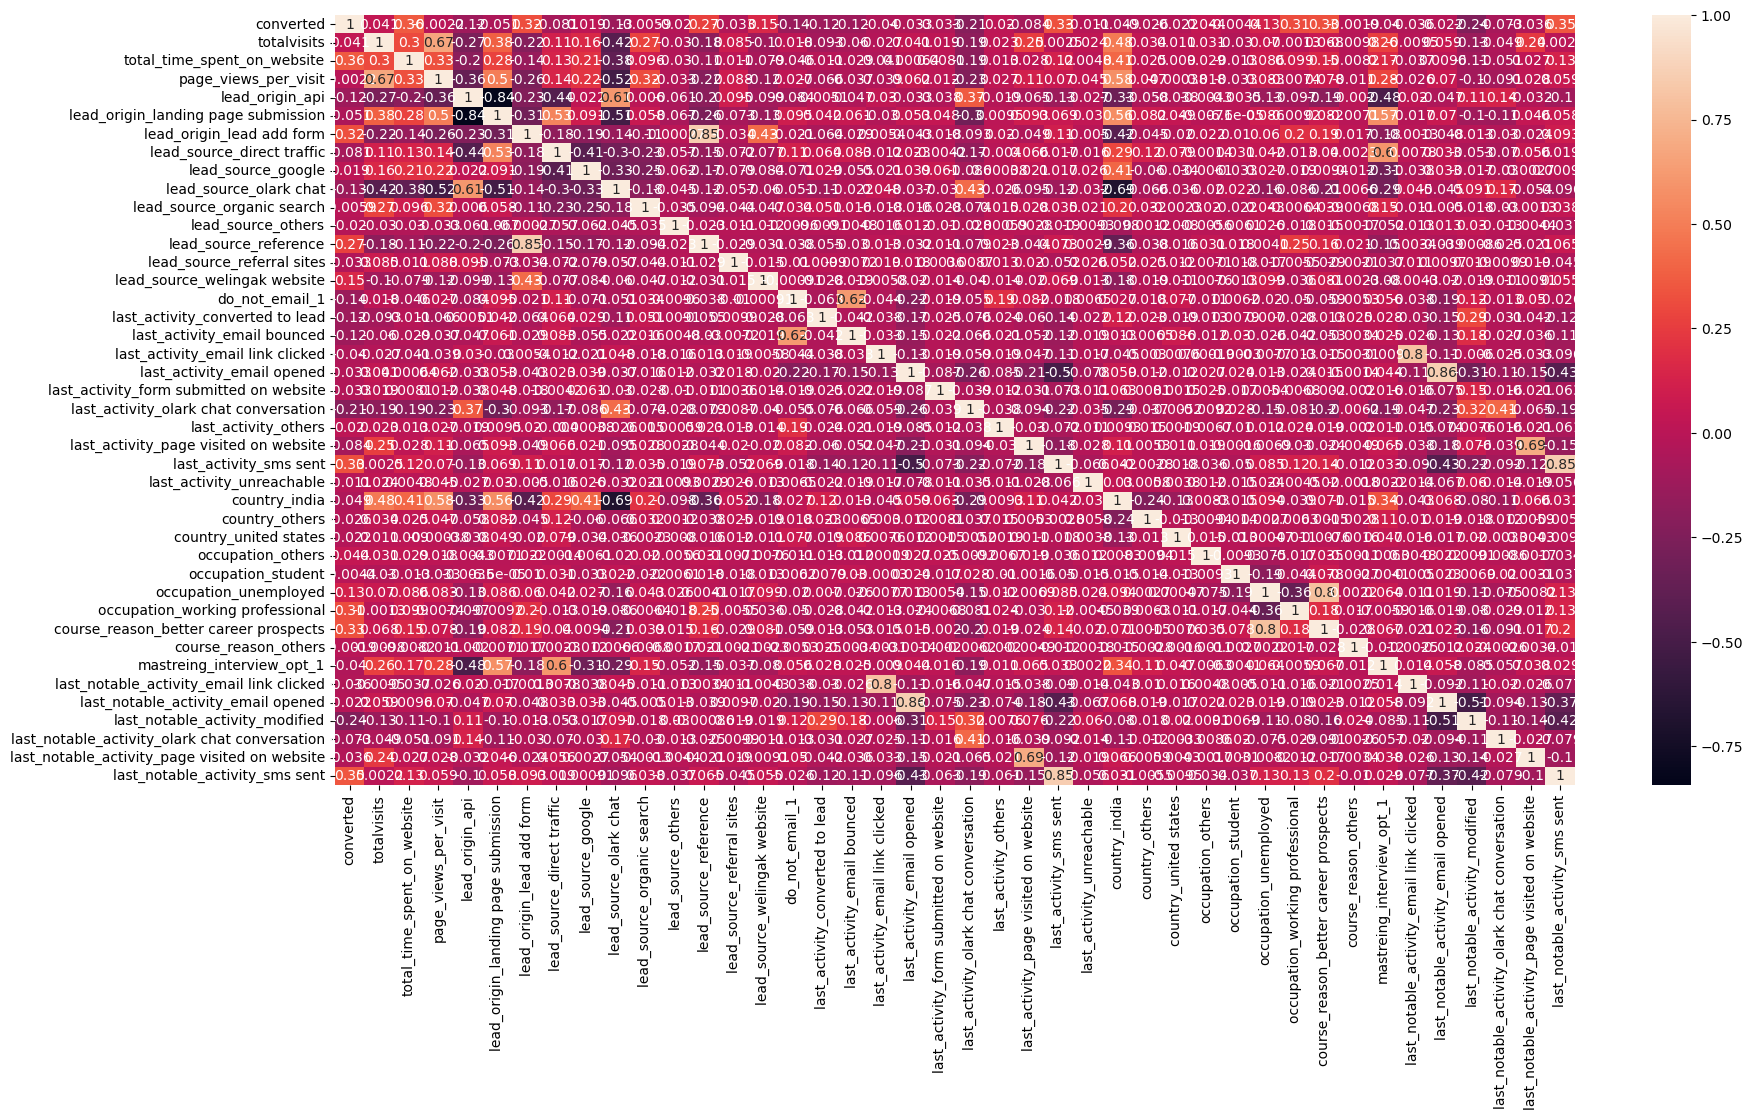

In [51]:
plt.figure(figsize = (20,10)) 
sns.heatmap(ml_df.corr(),annot = True)
plt.show()

In [52]:
# find pairs whose correlation is > 0.7
corr = ml_df.corr()
corr[(corr>0.7) & (corr<1)].stack()

lead_origin_lead add form                 lead_source_reference                       0.853237
lead_source_reference                     lead_origin_lead add form                   0.853237
last_activity_email link clicked          last_notable_activity_email link clicked    0.800764
last_activity_email opened                last_notable_activity_email opened          0.862718
last_activity_sms sent                    last_notable_activity_sms sent              0.852707
occupation_unemployed                     course_reason_better career prospects       0.798003
course_reason_better career prospects     occupation_unemployed                       0.798003
last_notable_activity_email link clicked  last_activity_email link clicked            0.800764
last_notable_activity_email opened        last_activity_email opened                  0.862718
last_notable_activity_sms sent            last_activity_sms sent                      0.852707
dtype: float64

In [53]:
high_corr_cols = ["lead_origin_lead add form",
                  "course_reason_better career prospects",
                 "last_notable_activity_email link clicked",
                 "last_notable_activity_email opened",
                 "last_notable_activity_sms sent",
                 "last_notable_activity_page visited on website",
                 "last_notable_activity_modified",
                 "last_notable_activity_olark chat conversation"]
ml_df.drop(columns=high_corr_cols, inplace=True)

In [54]:
ml_df.columns

Index(['converted', 'totalvisits', 'total_time_spent_on_website',
       'page_views_per_visit', 'lead_origin_api',
       'lead_origin_landing page submission', 'lead_source_direct traffic',
       'lead_source_google', 'lead_source_olark chat',
       'lead_source_organic search', 'lead_source_others',
       'lead_source_reference', 'lead_source_referral sites',
       'lead_source_welingak website', 'do_not_email_1',
       'last_activity_converted to lead', 'last_activity_email bounced',
       'last_activity_email link clicked', 'last_activity_email opened',
       'last_activity_form submitted on website',
       'last_activity_olark chat conversation', 'last_activity_others',
       'last_activity_page visited on website', 'last_activity_sms sent',
       'last_activity_unreachable', 'country_india', 'country_others',
       'country_united states', 'occupation_others', 'occupation_student',
       'occupation_unemployed', 'occupation_working professional',
       'course_reaso

In [55]:
# making sure trasnformations haven't impacted target variable
ml_df.converted.value_counts()

0    5679
1    3561
Name: converted, dtype: int64

## Test-Train Split

In [56]:
# Putting feature variable to X
X = ml_df.drop(columns=target_col)
X.head()

,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_api,lead_origin_landing page submission,lead_source_direct traffic,lead_source_google,lead_source_olark chat,lead_source_organic search,lead_source_others,...,last_activity_unreachable,country_india,country_others,country_united states,occupation_others,occupation_student,occupation_unemployed,occupation_working professional,course_reason_others,mastreing_interview_opt_1
0,0.0,0.0,0.0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,5.0,674.0,2.5,1,0,0,0,0,1,0,...,0,1,0,0,0,0,1,0,0,0
2,2.0,1532.0,2.0,0,1,1,0,0,0,0,...,0,1,0,0,0,1,0,0,0,1
3,1.0,305.0,1.0,0,1,1,0,0,0,0,...,1,1,0,0,0,0,1,0,0,0
4,2.0,1428.0,1.0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0


In [57]:
y = ml_df[target_col]
y.value_counts()

0    5679
1    3561
Name: converted, dtype: int64

In [58]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, 
                                                    test_size=0.3, random_state=100)

# Feature Scaling

In [59]:
scaler = StandardScaler()
X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_train.head()

,totalvisits,total_time_spent_on_website,page_views_per_visit,lead_origin_api,lead_origin_landing page submission,lead_source_direct traffic,lead_source_google,lead_source_olark chat,lead_source_organic search,lead_source_others,...,last_activity_unreachable,country_india,country_others,country_united states,occupation_others,occupation_student,occupation_unemployed,occupation_working professional,course_reason_others,mastreing_interview_opt_1
1871,-0.953438,-0.885371,-1.141767,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
6795,0.169768,0.005716,-0.494340,0,1,1,0,0,0,0,...,0,1,0,0,0,0,1,0,0,1
3516,0.450570,-0.691418,0.075200,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
8105,0.450570,1.365219,1.292166,0,1,0,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3934,-0.953438,-0.885371,-1.141767,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0


## Model Building

In [60]:
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
logreg = LogisticRegression()

In [61]:
def get_vif(col):
    vif = pd.DataFrame()
    vif['Features'] = X_train[col].columns
    vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [62]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    fig1 = plt.gcf()
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    title = 'Receiver operating characteristic example'
    plt.title(title)
    plt.legend(loc="lower right")
    plt.figure(figsize=(860/192, 880/192), dpi=192)
    fig1.savefig(f'Graphs/{title.lower().replace(" ","_")}',dpi=192, 
                 pad_inches=0.1, bbox_inches="tight", transparent=True)

    return None

In [63]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, n_features_to_select=20)
rfe = rfe.fit(X_train, y_train)
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

/Users/gg/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/gg/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

[('totalvisits', False, 9),
 ('total_time_spent_on_website', True, 1),
 ('page_views_per_visit', False, 10),
 ('lead_origin_api', True, 1),
 ('lead_origin_landing page submission', True, 1),
 ('lead_source_direct traffic', True, 1),
 ('lead_source_google', True, 1),
 ('lead_source_olark chat', False, 11),
 ('lead_source_organic search', True, 1),
 ('lead_source_others', True, 1),
 ('lead_source_reference', True, 1),
 ('lead_source_referral sites', True, 1),
 ('lead_source_welingak website', True, 1),
 ('do_not_email_1', True, 1),
 ('last_activity_converted to lead', True, 1),
 ('last_activity_email bounced', False, 12),
 ('last_activity_email link clicked', False, 7),
 ('last_activity_email opened', True, 1),
 ('last_activity_form submitted on website', False, 8),
 ('last_activity_olark chat conversation', True, 1),
 ('last_activity_others', True, 1),
 ('last_activity_page visited on website', False, 6),
 ('last_activity_sms sent', True, 1),
 ('last_activity_unreachable', False, 2),
 (

In [64]:
cols = X_train.columns[rfe.support_]
cols

Index(['total_time_spent_on_website', 'lead_origin_api',
       'lead_origin_landing page submission', 'lead_source_direct traffic',
       'lead_source_google', 'lead_source_organic search',
       'lead_source_others', 'lead_source_reference',
       'lead_source_referral sites', 'lead_source_welingak website',
       'do_not_email_1', 'last_activity_converted to lead',
       'last_activity_email opened', 'last_activity_olark chat conversation',
       'last_activity_others', 'last_activity_sms sent', 'occupation_others',
       'occupation_student', 'occupation_unemployed',
       'occupation_working professional'],
      dtype='object')

In [65]:
X_train.columns[~rfe.support_]

Index(['totalvisits', 'page_views_per_visit', 'lead_source_olark chat',
       'last_activity_email bounced', 'last_activity_email link clicked',
       'last_activity_form submitted on website',
       'last_activity_page visited on website', 'last_activity_unreachable',
       'country_india', 'country_others', 'country_united states',
       'course_reason_others', 'mastreing_interview_opt_1'],
      dtype='object')

### Model 1

In [66]:
X_train_sm = sm.add_constant(X_train[cols])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6447
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2634.0
Date:                Sun, 16 Apr 2023   Deviance:                       5268.0
Time:                        02:53:53   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4024
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -0.3925      0.419     -0.937      0.349      -1.214       0.429
total_time_spent_on_website               1.0746      0.040     27.022      0.000       0.997       1.153
lead_origin_api                          -1.0713      0.406     -2.640      0.008      -1.867      -0.276
lead_origin_landing page submission      -1.2739      0.412     -3.093      0.002      -2.081      -0.467
lead_source_direct traffic               -1.3268      0.148     -8.953      0.000      -1.617      -1.036
lead_source_google                       -0.9826      0.125     -7.841      0.000      -1.228      -0.737
lead_source_organic search               -1.1549      0.147     -7.879      0.000      -1.442      -0.868
lead_source_others                       -1.6122      0.484     -3.330      0.001      -2.561      -0.663
lead_source_reference                     1.0301      0.443      2.325      0.020       0.162       1.899
lead_source_referral sites               -1.1649      0.324     -3.591      0.000      -1.801      -0.529
lead_source_welingak website              2.9579      0.825      3.585      0.000       1.341       4.575
do_not_email_1                           -1.2737      0.178     -7.172      0.000      -1.622      -0.926
last_activity_converted to lead          -0.7653      0.238     -3.219      0.001      -1.231      -0.299
last_activity_email opened                0.5746      0.115      5.004      0.000       0.350       0.800
last_activity_olark chat conversation    -0.8324      0.191     -4.369      0.000      -1.206      -0.459
last_activity_others                      1.6857      0.333      5.066      0.000       1.034       2.338
last_activity_sms sent                    1.6710      0.116     14.377      0.000       1.443       1.899
occupation_others                         2.2063      0.517      4.265      0.000       1.192       3.220
occupation_student                        1.2647      0.238      5.316      0.000       0.798       1.731
occupation_unemployed                     1.1758      0.087     13.513      0.000       1.005       1.346
occupation_working professional           3.7215      0.200     18.650      0.000       3.330       4.113
=========================================================================================================
"""

In [67]:
get_vif(cols)

,Features,VIF
2,lead_origin_landing page submission,11.81
1,lead_origin_api,5.82
3,lead_source_direct traffic,5.07
4,lead_source_google,4.27
12,last_activity_email opened,3.62
18,occupation_unemployed,3.30
15,last_activity_sms sent,2.98
5,lead_source_organic search,2.29
13,last_activity_olark chat conversation,2.00
7,lead_source_reference,1.66


All P values are significant, **Drop "lead_origin_landing page submission" as it has has high VIF**

In [68]:
cols = cols.drop("lead_origin_landing page submission")

In [69]:
X_train_sm = sm.add_constant(X_train[cols])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res2 = logm2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6448
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2639.2
Date:                Sun, 16 Apr 2023   Deviance:                       5278.5
Time:                        02:53:54   Pearson chi2:                 7.27e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4015
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.5656      0.169     -9.262      0.000      -1.897      -1.234
total_time_spent_on_website               1.0749      0.040     27.052      0.000       0.997       1.153
lead_origin_api                           0.1411      0.096      1.466      0.143      -0.048       0.330
lead_source_direct traffic               -1.4345      0.144     -9.931      0.000      -1.718      -1.151
lead_source_google                       -1.0662      0.123     -8.692      0.000      -1.307      -0.826
lead_source_organic search               -1.2409      0.144     -8.606      0.000      -1.523      -0.958
lead_source_others                       -0.7305      0.371     -1.968      0.049      -1.458      -0.003
lead_source_reference                     2.1922      0.228      9.626      0.000       1.746       2.639
lead_source_referral sites               -1.2216      0.324     -3.767      0.000      -1.857      -0.586
lead_source_welingak website              4.1120      0.734      5.606      0.000       2.674       5.550
do_not_email_1                           -1.2320      0.175     -7.027      0.000      -1.576      -0.888
last_activity_converted to lead          -0.7662      0.238     -3.225      0.001      -1.232      -0.301
last_activity_email opened                0.5632      0.114      4.919      0.000       0.339       0.788
last_activity_olark chat conversation    -0.8606      0.190     -4.529      0.000      -1.233      -0.488
last_activity_others                      1.6973      0.332      5.120      0.000       1.048       2.347
last_activity_sms sent                    1.6693      0.116     14.404      0.000       1.442       1.896
occupation_others                         2.2222      0.517      4.295      0.000       1.208       3.236
occupation_student                        1.2657      0.237      5.339      0.000       0.801       1.730
occupation_unemployed                     1.1914      0.087     13.724      0.000       1.021       1.362
occupation_working professional           3.7287      0.199     18.692      0.000       3.338       4.120
=========================================================================================================
"""

In [70]:
get_vif(cols)

,Features,VIF
17,occupation_unemployed,3.08
11,last_activity_email opened,2.85
2,lead_source_direct traffic,2.57
14,last_activity_sms sent,2.46
3,lead_source_google,2.39
1,lead_origin_api,2.22
12,last_activity_olark chat conversation,1.58
4,lead_source_organic search,1.56
6,lead_source_reference,1.47
18,occupation_working professional,1.41


**Drop "lead_origin_api" as its p value is insignificant**

In [71]:
cols = cols.drop("lead_origin_api")
X_train_sm = sm.add_constant(X_train[cols])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res3 = logm3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6449
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2640.3
Date:                Sun, 16 Apr 2023   Deviance:                       5280.6
Time:                        02:53:54   Pearson chi2:                 7.26e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4013
Covariance Type:            nonrobust                                         
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                    -1.4311      0.142    -10.082      0.000      -1.709      -1.153
total_time_spent_on_website               1.0746      0.040     27.047      0.000       0.997       1.152
lead_source_direct traffic               -1.5602      0.117    -13.365      0.000      -1.789      -1.331
lead_source_google                       -1.1445      0.111    -10.325      0.000      -1.362      -0.927
lead_source_organic search               -1.3185      0.134     -9.809      0.000      -1.582      -1.055
lead_source_others                       -0.8579      0.361     -2.378      0.017      -1.565      -0.151
lead_source_reference                     2.0623      0.210      9.828      0.000       1.651       2.474
lead_source_referral sites               -1.2445      0.325     -3.834      0.000      -1.881      -0.608
lead_source_welingak website              3.9839      0.728      5.470      0.000       2.556       5.412
do_not_email_1                           -1.2399      0.175     -7.076      0.000      -1.583      -0.896
last_activity_converted to lead          -0.7537      0.238     -3.173      0.002      -1.219      -0.288
last_activity_email opened                0.5683      0.114      4.965      0.000       0.344       0.793
last_activity_olark chat conversation    -0.8341      0.189     -4.408      0.000      -1.205      -0.463
last_activity_others                      1.6998      0.332      5.125      0.000       1.050       2.350
last_activity_sms sent                    1.6685      0.116     14.397      0.000       1.441       1.896
occupation_others                         2.2242      0.518      4.292      0.000       1.208       3.240
occupation_student                        1.2584      0.237      5.309      0.000       0.794       1.723
occupation_unemployed                     1.1848      0.087     13.677      0.000       1.015       1.355
occupation_working professional           3.7174      0.199     18.653      0.000       3.327       4.108
=========================================================================================================
"""

In [72]:
get_vif(cols)

,Features,VIF
16,occupation_unemployed,3.00
10,last_activity_email opened,2.39
2,lead_source_google,2.38
1,lead_source_direct traffic,2.27
13,last_activity_sms sent,2.20
3,lead_source_organic search,1.55
17,occupation_working professional,1.40
5,lead_source_reference,1.38
9,last_activity_converted to lead,1.25
8,do_not_email_1,1.22


**All Vifs are low and P values are significant, we can consider this model**

In [73]:
cols

Index(['total_time_spent_on_website', 'lead_source_direct traffic',
       'lead_source_google', 'lead_source_organic search',
       'lead_source_others', 'lead_source_reference',
       'lead_source_referral sites', 'lead_source_welingak website',
       'do_not_email_1', 'last_activity_converted to lead',
       'last_activity_email opened', 'last_activity_olark chat conversation',
       'last_activity_others', 'last_activity_sms sent', 'occupation_others',
       'occupation_student', 'occupation_unemployed',
       'occupation_working professional'],
      dtype='object')

In [74]:
# Getting the predicted values on the train set
y_train_pred = res3.predict(X_train_sm)
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred_df = pd.DataFrame({'converted':y_train.values, 'converted_prob':y_train_pred})
y_train_pred_df.head()

,converted,converted_prob
0,0,0.347663
1,0,0.225832
2,0,0.396298
3,0,0.851292
4,0,0.347663


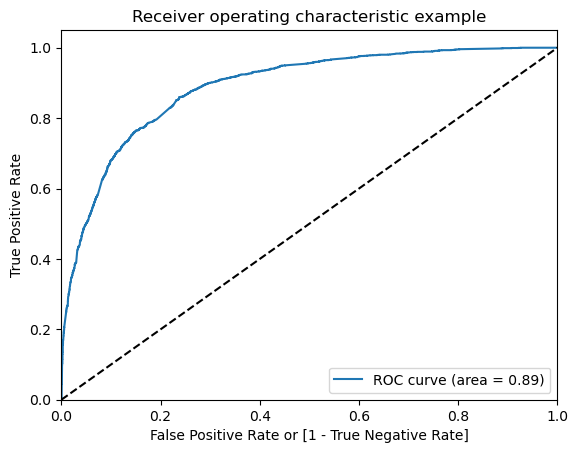

<Figure size 860x880 with 0 Axes>

In [75]:
draw_roc(y_train_pred_df.converted, y_train_pred_df.converted_prob)

**AUC is 0.89, we have a good model. lets now find out optimal cut off**

## Finding Optimal Cut off

In [76]:
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df['converted_prob'].map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,converted,converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.347663,1,1,1,1,0,0,0,0,0,0
1,0,0.225832,1,1,1,0,0,0,0,0,0,0
2,0,0.396298,1,1,1,1,0,0,0,0,0,0
3,0,0.851292,1,1,1,1,1,1,1,1,1,0
4,0,0.347663,1,1,1,1,0,0,0,0,0,0


     prob  accuracy     sensi     speci
0.0   0.0  0.381262  1.000000  0.000000
0.1   0.1  0.612554  0.976886  0.388056
0.2   0.2  0.758349  0.914031  0.662419
0.3   0.3  0.793908  0.866586  0.749125
0.4   0.4  0.816790  0.764801  0.848826
0.5   0.5  0.817409  0.697891  0.891054
0.6   0.6  0.807823  0.636659  0.913293
0.7   0.7  0.782622  0.519465  0.944778
0.8   0.8  0.760823  0.425791  0.967266
0.9   0.9  0.717996  0.281833  0.986757


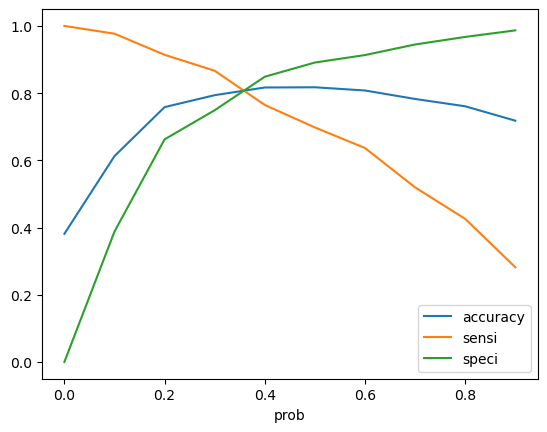

In [77]:
# calculating accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df['converted'], y_train_pred_df[i] )
    total=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

Optimal cut off seems to be around **0.35**

In [78]:
optimal_cut_off = 0.37

In [79]:
y_train_pred_df['final_predicted'] = y_train_pred_df['converted_prob'].map( lambda x: 1 if x > optimal_cut_off else 0)

y_train_pred_df.head()

,converted,converted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.347663,1,1,1,1,0,0,0,0,0,0,0
1,0,0.225832,1,1,1,0,0,0,0,0,0,0,0
2,0,0.396298,1,1,1,1,0,0,0,0,0,0,1
3,0,0.851292,1,1,1,1,1,1,1,1,1,0,1
4,0,0.347663,1,1,1,1,0,0,0,0,0,0,0


In [80]:
confusion_matrix = metrics.confusion_matrix(y_train_pred_df['converted'], 
                                            y_train_pred_df['final_predicted'])
confusion_matrix

array([[3311,  691],
       [ 534, 1932]])

In [81]:
def print_metrics(df, cm):
    TP = cm[1,1] # true positive 
    TN = cm[0,0] # true negatives
    FP = cm[0,1] # false positives
    FN = cm[1,0] # false negatives

    accuracy = metrics.accuracy_score(df['converted'], df['final_predicted']) # how good was overall prediction
    sensitivity = TP / float(TP+FN) # how good postives were predicted
    specificity = TN / float(TN+FP) # how good negatives were predicted
    fpr = FP/ float(TN+FP) 
    precision = TP / float(TP+FP) # Out all predicted positives how many were correct
    print(f"accuracy: {accuracy}")
    print(f"sensitivity/Recall: {sensitivity}")
    print(f"specificity: {specificity}")
    print(f"fpr: {fpr}")
    print(f"precision: {precision}")

In [82]:
print_metrics(y_train_pred_df, confusion_matrix)

accuracy: 0.8106060606060606
sensitivity/Recall: 0.7834549878345499
specificity: 0.827336331834083
fpr: 0.17266366816591705
precision: 0.7365611894776973


## Precision and recall Tradeoff

Since our data is slightly imbalanced, we can use **Precision and recall Tradeoff** to verify our threshold

In [83]:
from sklearn.metrics import precision_recall_curve

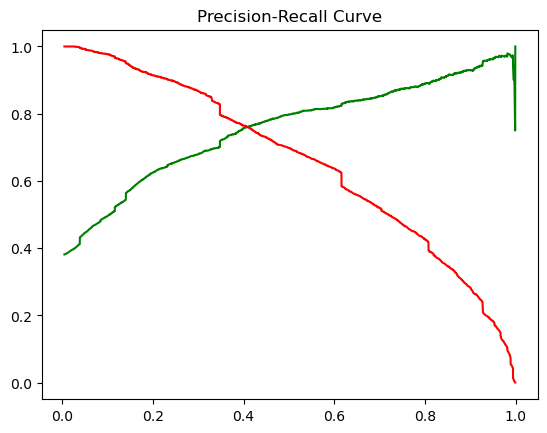

<Figure size 860x880 with 0 Axes>

In [84]:
p, r, thresholds = precision_recall_curve(y_train_pred_df["converted"], y_train_pred_df["converted_prob"])
fig1 = plt.gcf()
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.title("Precision-Recall Curve")
plt.figure(figsize=(860/192, 880/192), dpi=192)
fig1.savefig(f'Graphs/{"Precision-Recall Curve".lower().replace(" ","_")}',dpi=192, 
                 pad_inches=0.1, bbox_inches="tight", transparent=True)


This also indicates value close to 0.4 hence we can choose **0.37 to be our threhold**

# Making Predictions on test set

In [85]:
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [86]:
X_test = X_test[cols]
X_test_sm = sm.add_constant(X_test)
X_test_sm.head()

,const,total_time_spent_on_website,lead_source_direct traffic,lead_source_google,lead_source_organic search,lead_source_others,lead_source_reference,lead_source_referral sites,lead_source_welingak website,do_not_email_1,last_activity_converted to lead,last_activity_email opened,last_activity_olark chat conversation,last_activity_others,last_activity_sms sent,occupation_others,occupation_student,occupation_unemployed,occupation_working professional
4269,1.0,0.964504,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2376,1.0,-0.885371,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0
7766,1.0,-0.777416,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
9199,1.0,-0.885371,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
4359,1.0,-0.885371,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0


In [87]:
X_test_sm.shape

(2772, 19)

In [88]:
y_test_pred = res3.predict(X_test_sm)

In [89]:
y_test_pred_df = pd.DataFrame(y_test)

In [90]:
y_test_pred_df["converted_prob"] = y_test_pred

In [91]:
y_test_pred_df.reset_index(drop=True,inplace=True)

In [92]:
y_test_pred_df['final_predicted'] = y_test_pred_df.converted_prob.map(lambda x: 1 if x > optimal_cut_off else 0)

In [93]:
confusion_matrix_test = metrics.confusion_matrix(y_test_pred_df['converted'], 
                                            y_test_pred_df['final_predicted'])
confusion_matrix_test

array([[1395,  282],
       [ 249,  846]])

In [94]:
print("-*"*10+"Train Metrics"+"-*"*10)
print_metrics(y_train_pred_df, confusion_matrix)
print("")
print("-*"*10+"Test Metrics"+"-*"*10)
print_metrics(y_test_pred_df, confusion_matrix_test)

-*-*-*-*-*-*-*-*-*-*Train Metrics-*-*-*-*-*-*-*-*-*-*
accuracy: 0.8106060606060606
sensitivity/Recall: 0.7834549878345499
specificity: 0.827336331834083
fpr: 0.17266366816591705
precision: 0.7365611894776973

-*-*-*-*-*-*-*-*-*-*Test Metrics-*-*-*-*-*-*-*-*-*-*
accuracy: 0.8084415584415584
sensitivity/Recall: 0.7726027397260274
specificity: 0.8318425760286225
fpr: 0.16815742397137745
precision: 0.75


**Test dataset Produces similar results like train dataset, 
hence we can conclude that our model is statistically good**

# Top Features

In [95]:
res3.params.sort_values(ascending=False).iloc[:]

lead_source_welingak website             3.983940
occupation_working professional          3.717404
occupation_others                        2.224231
lead_source_reference                    2.062279
last_activity_others                     1.699773
last_activity_sms sent                   1.668509
occupation_student                       1.258377
occupation_unemployed                    1.184807
total_time_spent_on_website              1.074556
last_activity_email opened               0.568345
last_activity_converted to lead         -0.753706
last_activity_olark chat conversation   -0.834096
lead_source_others                      -0.857941
lead_source_google                      -1.144451
do_not_email_1                          -1.239934
lead_source_referral sites              -1.244498
lead_source_organic search              -1.318488
const                                   -1.431101
lead_source_direct traffic              -1.560190
dtype: float64

1. **lead_source_welingak website**: If lead was obtained from this website, conversion chances are high
1. **occupation_working professional**: More likely to convert, than people in other occupation
1. **lead_source_reference**: if lead was obtained through refrence then more like to convert 
1. **total_time_spent_on_website**: if customer spent more time on website, he/she is more likely to convert
1. **do_not_email_1**: if customer opted for no mail, less likely to convert
1. **lead_source_direct traffic**: if customer vistited site directly or through google or through referral sites then they are less likely to convert